***!!! протестировать алгоритмы на многомодальных функциях!!!*** - done


### Лабораторная работа №2
#### **Цель**
• Решить задачу в соответствии с номером варианта


#### **Постановка задачи**
• Реализовать алгоритмы одномерной минимизации функции без производной: метод дихотомии, метод золотого сечения, метод Фиббоначи, метод парабол и комбинированный метод Брента

• Сравнить метолы по количеству итераций и количеству вычислений функции в зависимости от разной точности

• Протестировать реализованные алгоритмы для задач минимизации многомодальных функций
#### **Ход выполнения**
Постановка задачи: требуется найти минимум функции с заданной точностью ε, при этом функция является непрерывной и унимодальной на отрезке $[a, b]$.


---


Непрерывная функция $f(x)$ называется *унимодальной на отрезке* $[a, b]$ если:

• точка $x^*$ локального минимума функции принадлежит отрезку $[a, b]$;

• для любых двух точек отрезка $x_1$ и $x_2$ , взятых по одну сторону от точки минимума, точке $x_1$ более близкой к точке минимума соответствует меньшее значение функции, т.е. при $x^*< x_1 < x_2 $ либо при $x_2< x_1 < x^*$ справедливо неравенство $f(x_1)< f(x_2)$.


---




**Метод дихотомии**

Вычисляем две точки согласно следующим соотношениям:

\begin{equation}
    x_1=\frac{a_0+b_0-\delta}{2}\ и\ x_2=\frac{a_0+b_0+\delta}{2},
\end{equation}
где $\delta<ε$. И в каждой из найденных точек вычисляем значения функции: $f(x_1)$ и $f(x_2)$. 

  Далее сокращаем интервал неопределенности и получаем интервал $[a_1, b_1]$ следующим образом. Если $f(x_1) < f(x_2)$, то $a_1=a_0$ и $b_1=x_2$. В противном случае, если $f(x_1) > f(x_2)$, то $a_1=x_1$ и $b_1=b_0$.

В данном методе на каждой итерации минимизируемая функция $f(x)$ вычисляется дважды, а интервал неопределенности сокращается практически в два раза (при малых $\delta<ε$).



**Метод золотого сечения**

Данный метод позволяет найти минимум унимодальной функции на заданной области $[a_0, b_0]$, как правило, с меньшими вычислительными затратами, чем метод дихотомии.

На первой итерации находим две точки по следующим формулам:
\begin{equation}
    x_1=a_0+\frac{3-\sqrt{5}}{2}(b_0-a_0)=a_0+0.381966011\cdot(b_0-a_0),\\
    x_2=b_0+\frac{\sqrt{5}-3}{2}(b_0-a_0)=b_0-0.381966011\cdot(b_0-a_0){=a_0+0.6180033989\cdot(b_0-a_0)}
\end{equation}
и вычисляем значения функции $f(x_1)$ и $f(x_2)$. 

Обратим внимание, что на первой итерации находим 2 точки и дважды вычисляем $f(x)$.

Сокращаем интервал неопределенности.


1.   Если $f(x_1) < f(x_2)$, то $a_1=a_0$, $b_1=x_2$, $x_2=x_1$.
2.   В противном случае, если $f(x_1) > f(x_2)$, то $a_1=x_1$, $b_1=b_0$, $x_1=x_2$.


На последующих итерациях производим расчет только той точки и значение функции в ней, которые необходимо обновить: в первом случае вычисляем новое значение $x_1$ и $f(x_1)$; во втором случае $x_2$ и $f(x_2)$


На $i$-й итерации интервал неопределенности сокращается до величины $0.618003399\cdot(b_{i-1}-a_{i-1})$. Это меньше, чем в 2 раза, но зато всего один раз вычисляем значение $f(x)$ в новой точке.

**Метод Фиббоначи**

Последовательность чисел Фибоначчи подчиняется соотношению 
\begin{equation}
    F_{n+2}=F_{n+1}+F_n,
\end{equation}
где $n=1,2,3,...$ и $F_1=F_2$. Она имеет вид $1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597...\ .$ 

Первоначальный интервал неопределенности [В−А] принимается пропорциональным некоторому числу Фибоначчи $F_n$, определенному в зависимости от требуемой абсолютной погрешности решения ε как первое
число Фибоначчи, большее $\frac{В−А}{ε}$, т.e. $F_n > \frac{В−А}{ε}$.

Координаты первых двух поисковых точек $x_1$, $x_2$ делят отрезок $[B−A]$
на участки, пропорциональные $N_{n-2}$ и $N_{n-1}$, т.е.:

\begin{equation}
    x_{1}=A+\frac{N_{n-2}}{N_n}(B-A),\ \ \ \ x_{2}=A+\frac{N_{n-1}}{N_n}(B+A).
\end{equation}

Если измеренные или вычисленные значения целевой функции в этих
точках при необходимости отыскания экстремума-минимума отвечают
условию $F(x_1)<F(x_2)$, то смещается правая граница первоначального интервала неопределенности, т.е. $B = x_2$. Если $F(x_1) >F(x_2)$, то смещается левая
граница, т.е. принимается $A = x_1$. Тогда длина нового интервала неопределенности становится пропорциональной $N_{n-1}$, то есть равной $\frac{F_{n-1}}{F_n}$ части первоначального интервала неопределенности. После $k$-й итерации длина $k$-го интервала неопределенности становится равной $\frac{F_{n-k}}{F_n}$ части первоначального интервала неопределенности, а поисковые точки в нем будут иметь координаты:

\begin{equation}
    x_{1}^{(k)}=A+\frac{N_{n-k-2}}{N_{n-k}}(B-A),\ \ \ \ x_{2}^{(k)}=A+\frac{N_{n-k-1}}{N_{n-k}}(B+A).
\end{equation}

Число итераций $m$, необходимых для получения решения с заданной абсолютной погрешности ε, известно заранее и равно $n−2$, так как $N_1 = N_2 = 1$.


При каждой итерации в качестве одной из поисковых точек всегда оказывается одна из поисковых точек предыдущей итерации, значение целевой функции для которой уже вычислено или измерено. Следовательно,поиск Фибоначчи вдвое сокращает число поисковых экспериментов или
вычислений целевой функции.


**Метод парабол**

В методе парабол предлагается аппроксимировать оптимизируемую функцию $f(x)$ с помощью квадратичной функции

\begin{equation}
    p(x)=ax^2+bx+c.
\end{equation}

Пусть имеются три точки $x_1<x_2<x_3$ такие, что интервал $[x_1, x_3]$ содержит точку минимума функции $f$. Тогда коэффициенты аппроксимирующей параболы $a, b, c$ могут быть найдены путем решения системы линейных уравнений:

\begin{equation}
    ax_i^2+bx_i+c=f_i=f(x_i),\ i=1, 2, 3.
\end{equation}

Минимум такой параболы равен

\begin{equation}
    u=-\frac{b}{2a}=x_2-\frac{(x_2-x_1)^2(f_2-f_3)-(x_2-x_3)^2(f_2-f_1)}{2[(x_2-x_1)(f_2-f_3)-(x_2-x_3)(f_2-f_1)]}.
\end{equation}

Если $f_1<f_2$ и $f_2<f_3$, то точка $u$ гарантированно попадает в интервал $[x_1, x_3]$. Таким образом, внутри интервала $[x_1, x_3]$ определены две точки $x_2$ и $u$, с помощью сравнения значений функции $f$ в которых можно сократить интервал поиска. 

В отличие от метода золотого сечения, метод парабол обладает суперлинейной скоростью сходимости. Однако, такая высокая скорость сходимости гарантируется только в малой окрестности точки минимума $x_{min}$. На начальных стадиях процесса оптимизации метод парабол может делать очень маленькие шаги или, наоборот, слишком большие шаги, приводящие к неустойчивым биениям. Также следует отметить, что на первой итерации метод парабол требует измерения значений функции $f$  в крайних точках интервала оптимизации.


**Комбинированный метод Брента**


Метод золотого сечения представляет собой надежный способ оптимизации, который сходится за гарантированное число итераций, но обладает лишь линейной скоростью сходимости. Метод парабол работает быстрее в малой окрестности оптимального решения, но может работать долго и неустойчиво на начальных стадиях итерационного процесса. Поэтому на практике для решения задачи одномерной оптимизации используется метод Брента, который эффективно комбинирует эти две стратегии. В данном методе на каждой итерации отслеживаются значения в шести точках (необязательно различных): $a, c, x, w, v, u$. Точки $a, c$ задают текущий интервал поиска решения, $x$ –
точка, соответствующая наименьшему значению функции, $w$ – точка, соответветствующая второму
снизу значению функции, $v$ – предыдущее значение $w$. В отличие от метода парабол, в методе Брента аппроксимирующая парабола строится с помощью трех наилучших точек $x, w,$ $v$ (в случае, если эти три точки различны и значения в них также различны). При этом минимум аппроксимирующей
параболы $u$ принимается в качестве следующей точки оптимизационного процесса, если:
*   $u$ попадает внутрь интервала $[a, c]$ и отстоит от границ интервала не менее, чем на ε;
*   $u$ отстоит от точки $x$ не более, чем на половину от длины предпредыдущего шага

Если точка $u$ отвергается, то следующая точка находится с помощью золотого сечения большего из интервалов $[a, x]$ и $[x, c]$.

Приведем некоторые аргументы в пользу обозначенных условий приема минимума параболы $u$. Так как парабола на текущей итерации проводится через точки $x, w, v,$ для которых не гарантируются соотношения $v < x < w$ или $w < x < v$, то минимум параболы может оказаться вне интервала $[a, c]$. Условие удаленности точки $u$ от $a$ и $c$ не менее, чем на некоторый порог ε, позволяет избежать слишком маленьких шагов в оптимизации, которые могут свидетельствовать о локальном
застопоривании метода парабол. Аналогично, ограничение на максимальную удаленность $u$ от $x$ позволяет избежать слишком больших шагов в оптимизации, которые могут соответствовать биениям в методе парабол. Использование в данном ограничении длины предпредыдущего шага, а не предыдущего, является эвристикой, эффективность которой подтверждается в экспериментах на больших базах задач оптимизации. Эта эвристика предлагает не штрафовать метод за текущий не
слишком удачный маленький шаг в надежде на успешные шаги метода на следующих итерациях.

In [3]:
from math import e
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.ticker import MultipleLocator, AutoMinorLocator

'''
Константа золотого сечения
'''
K = (3 - np.sqrt(5)) / 2

Зададим функцию, описывающую волны:

In [4]:
def function(x):
    return (e ** (np.sin(x))) * (x ** 2)

Нарисуем график функции:

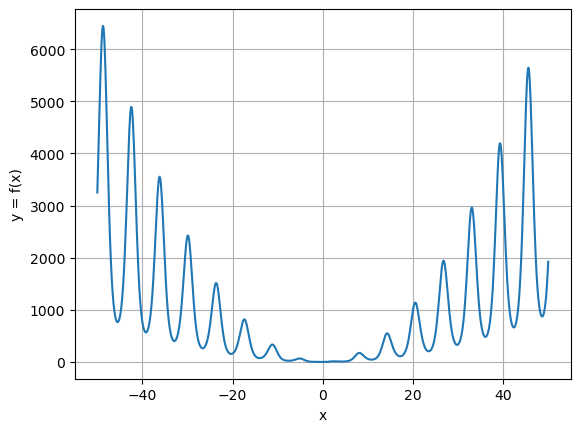

In [5]:
fig, ax = plt.subplots()
x = np.linspace(-50, 50, 1000)
y = (e ** (np.sin(x))) * (x ** 2)
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y = f(x)')
plt.grid()
plt.show()

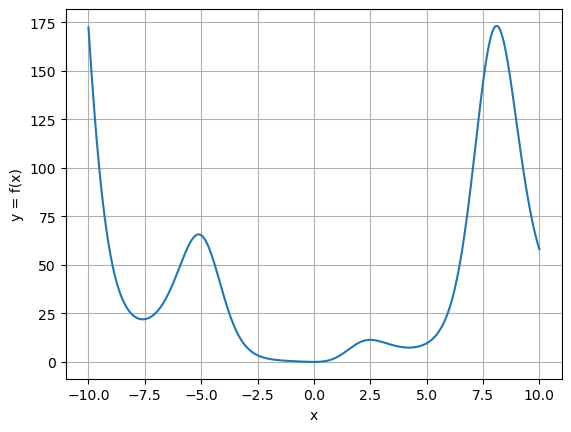

In [6]:
fig, ax = plt.subplots()
x = np.linspace(-10, 10, 500)
y = (e ** (np.sin(x))) * (x ** 2)
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y = f(x)')
plt.grid()
plt.show()

Будем искать минимум на отрезке неопределенности $[-10; -7]$ с погрешностью $ɛ$

In [7]:
a = -10
b = -7
eps = 0.001
real_min = -7.587228430511976

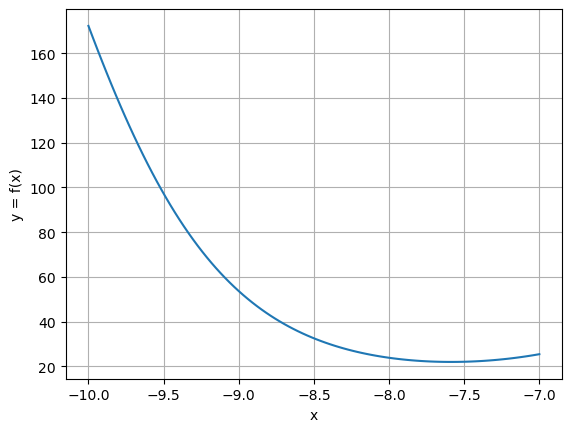

In [8]:
fig, ax = plt.subplots()
x = np.linspace(-10, -7, 100)
y = (e ** (np.sin(x))) * (x ** 2)
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y = f(x)')
plt.grid()
plt.show()

Напишем сами методы

### Метод дихотомии

In [9]:
def dichotomy_method(f, a, b, eps):
    right = b
    left = a
    delta = eps / 2
    calls = 0
    segments = pd.DataFrame({"left": [], "right": [], "length": [], "length diff": []})
    segments.index.name = "iteration"
    segments.loc[len(segments)] = [left, right, right - left, '']
    while right - left > eps:
        c = (left + right) / 2
        x1 = c - delta
        x2 = c + delta
        f1 = f(x1)
        f2 = f(x2)
        calls += 2
        if f1 > f2:
            left = x1 + delta
        if f1 < f2:
            right = x2 - delta
        segments.loc[len(segments)] = [left, right, right - left, segments.iloc[-1]["length"] / (right - left)]
    return (right + left) / 2, calls, segments

In [10]:
minimum, calls, dichotomy_segments = dichotomy_method(function, a, b, eps)
print(minimum, calls)
print(abs(real_min - minimum))
dichotomy_segments

-7.5870361328125 24
0.00019229769947592956


,left,right,length,length diff
iteration,,,,
0,-10.000000,-7.000000,3.000000,
1,-8.500000,-7.000000,1.500000,2.0
2,-7.750000,-7.000000,0.750000,2.0
3,-7.750000,-7.375000,0.375000,2.0
4,-7.750000,-7.562500,0.187500,2.0
5,-7.656250,-7.562500,0.093750,2.0
6,-7.609375,-7.562500,0.046875,2.0
7,-7.609375,-7.585938,0.023438,2.0
8,-7.597656,-7.585938,0.011719,2.0


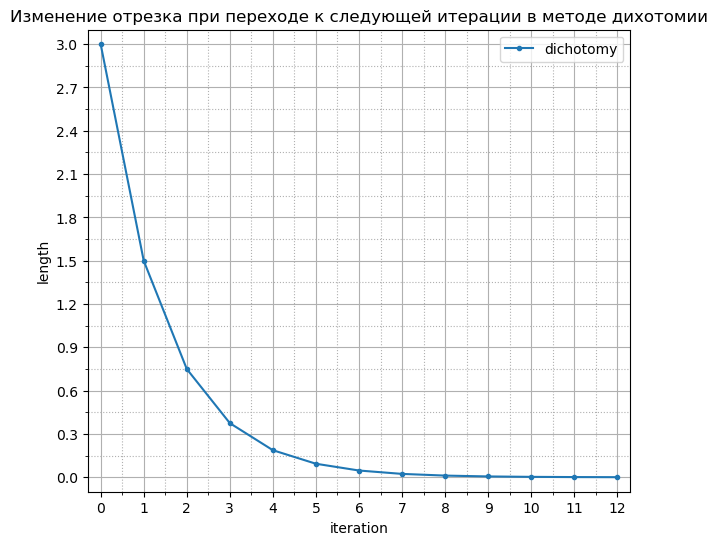

In [11]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(dichotomy_segments.index, dichotomy_segments["length"], label="dichotomy", marker='.')
ax.set_title("Изменение отрезка при переходе к следующей итерации в методе дихотомии")
ax.set_xlabel("iteration")
ax.set_ylabel("length")
ax.legend()

ax.set_xlim((-0.3, 12.3))
ax.set_ylim((-0.1, 3.1))

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))

ax.yaxis.set_major_locator(MultipleLocator(0.3))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle=':')

plt.show()

### Метод золотого сечения

In [12]:
def golden_method(f, a, b, eps):
    right = b
    left = a
    phi = (1 + np.sqrt(5)) / 2
    resphi = 2 - phi
    x1 = left + resphi * (right - left)
    x2 = right - resphi * (right - left)
    f1 = f(x1)
    f2 = f(x2)
    calls = 2
    segments = pd.DataFrame({"left": [], "right": [], "length": [], "length diff": []})
    segments.index.name = "iteration"
    segments.loc[len(segments)] = [left, right, right - left, '']
    while abs(right - left) > eps:
        if f1 < f2:
            right = x2
            x2 = x1
            f2 = f1
            x1 = left + resphi * (right - left)
            f1 = f(x1)
        else:
            left = x1
            x1 = x2
            f1 = f2
            x2 = right - resphi * (right - left)
            f2 = f(x2)
        calls += 1
        segments.loc[len(segments)] = [left, right, right - left, segments.iloc[-1]["length"] / (right - left)]
    return (x1 + x2) / 2, calls, segments

In [13]:
minimum, calls, golden_segments = golden_method(function, a, b, eps)
print(minimum, calls)
print(abs(real_min - minimum))
golden_segments

-7.587183912350865 19
4.451816111128437e-05


,left,right,length,length diff
iteration,,,,
0,-10.000000,-7.000000,3.000000,
1,-8.854102,-7.000000,1.854102,1.618034
2,-8.145898,-7.000000,1.145898,1.618034
3,-8.145898,-7.437694,0.708204,1.618034
4,-7.875388,-7.437694,0.437694,1.618034
5,-7.708204,-7.437694,0.270510,1.618034
6,-7.708204,-7.541020,0.167184,1.618034
7,-7.644345,-7.541020,0.103326,1.618034
8,-7.604878,-7.541020,0.063859,1.618034


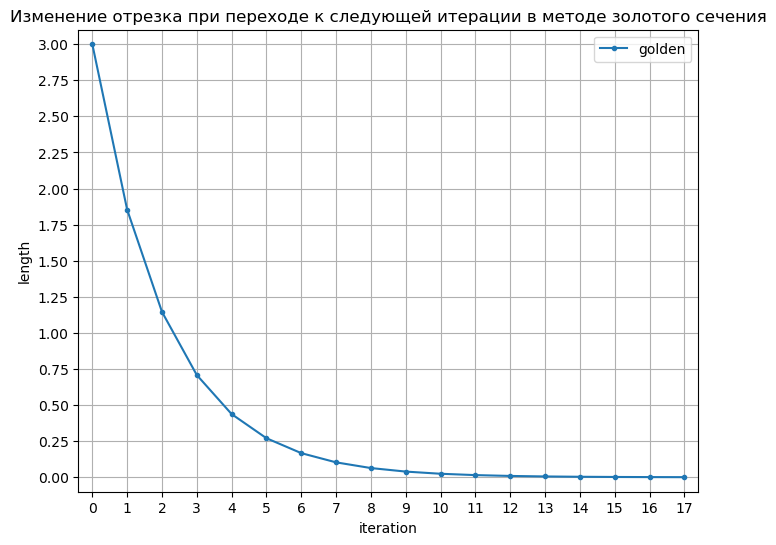

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(golden_segments.index, golden_segments["length"], label="golden", marker='.')
ax.set_title("Изменение отрезка при переходе к следующей итерации в методе золотого сечения")
ax.set_xlabel("iteration")
ax.set_ylabel("length")
ax.legend()

ax.set_xlim((-0.4, 17.4))
ax.set_ylim((-0.1, 3.1))

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(0.25))

ax.grid(which='major', linestyle='-')

plt.show()

### Метод Фибоначчи

In [15]:
def fibonacci_method(f, a, b, length):
    eps = 0.01
    right = b
    left = a
    fibonacci_list = [1, 1]
    index = 1
    while fibonacci_list[index] < (right - left) / length:
        index += 1
        fibonacci_list.append(fibonacci_list[index - 1] + fibonacci_list[index - 2])

    n = len(fibonacci_list) - 1
    lambda_ = left + fibonacci_list[n - 2] / fibonacci_list[n] * (right - left)
    mu_ = left + fibonacci_list[n - 1] / fibonacci_list[n] * (right - left)

    f_lambda = f(lambda_)
    f_mu = f(mu_)
    calls = 2
    segments = pd.DataFrame({"left": [], "right": [], "length": [], "length diff": []})
    segments.index.name = "iteration"
    segments.loc[len(segments)] = [left, right, right - left, '']

    for k in range(1, n):
        if f_lambda > f_mu:
            left = lambda_
            lambda_ = mu_
            f_lambda = f_mu
            if k == n - 2:
                mu_ = left + (0.5 + eps) * (right - left)
            else:
                mu_ = left + fibonacci_list[n - k] / fibonacci_list[n - k + 1] * (right - left)
            f_mu = f(mu_)
        else:
            right = mu_
            mu_ = lambda_
            f_mu = f_lambda
            if k == n - 2:
                lambda_ = left + (0.5 - eps) * (right - left)
            else:
                lambda_ = left + fibonacci_list[n - k - 1] / fibonacci_list[n - k + 1] * (right - left)
            f_lambda = f(lambda_)
        calls += 1
        segments.loc[len(segments)] = [left, right, right - left, segments.iloc[-1]["length"] / (right - left)]

    return (right + left) / 2, calls, segments


In [16]:
minimum, calls, fibonacci_segments = fibonacci_method(function, a, b, eps)
print(minimum, calls)
print(abs(real_min - minimum))
fibonacci_segments

-7.587243930531349 19
1.5500019372893803e-05


,left,right,length,length diff
iteration,,,,
0,-10.000000,-7.000000,3.000000,
1,-8.854102,-7.000000,1.854102,1.618034
2,-8.145898,-7.000000,1.145898,1.618034
3,-8.145898,-7.437694,0.708204,1.618034
4,-7.875388,-7.437694,0.437694,1.618034
5,-7.708204,-7.437694,0.270510,1.618033
6,-7.708204,-7.541020,0.167184,1.618037
7,-7.644346,-7.541020,0.103326,1.618026
8,-7.604878,-7.541020,0.063858,1.618054


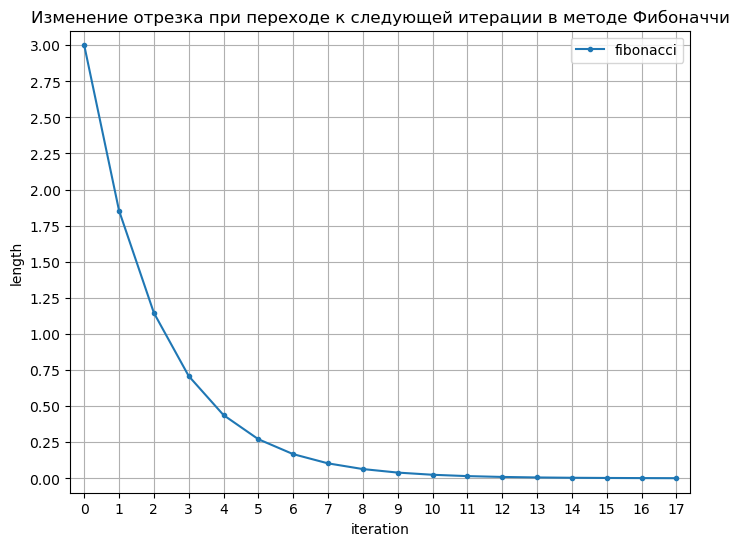

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(fibonacci_segments.index, fibonacci_segments["length"], label="fibonacci", marker='.')
ax.set_title("Изменение отрезка при переходе к следующей итерации в методе Фибоначчи")
ax.set_xlabel("iteration")
ax.set_ylabel("length")
ax.legend()

ax.set_xlim((-0.4, 17.4))
ax.set_ylim((-0.1, 3.1))

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(0.25))

ax.grid(which='major', linestyle='-')

plt.show()

### Метод парабол

In [18]:
def parabola_method(func, left, right, eps):
    x = (right + left) / 2
    f_left = func(left)
    f_right = func(right)
    f_x = func(x)
    calls = 3
    segments = pd.DataFrame({"left": [], "right": [], "length": [], "length diff": []})
    segments.index.name = "iteration"
    segments.loc[len(segments)] = [left, right, right - left, '']

    while right - left > eps:
        dividend = (((x - left)**2) * (f_x - f_right) - ((x - right)**2) * (f_x - f_left))
        divisor = (2 * ((x - left) * (f_x - f_right) - (x - right) * (f_x - f_left)))
        u = x - np.divide(dividend, divisor)
        if np.isnan(u) or len(segments) > 10000:
            break
        if u == x:
            return u, calls, segments
        f_u = func(u)
        calls += 1

        if x < u:
            if f_x < f_u:
                right = u
                f_right = f_u
            else:
                left = x
                f_left = f_x
                x = u
                f_x = f_u
        else:
            if f_u < f_x:
                right = x
                f_right = f_x
                x = u
                f_x = f_u
            else:
                left = u
                f_left = f_u
        segments.loc[len(segments)] = [left, right, right - left, segments.iloc[-1]["length"] / (right - left)]
    return (right + left) / 2, calls, segments

In [19]:
minimum, calls, parabola_segments = parabola_method(function, a, b, eps)
print(minimum, calls)
print(abs(real_min - minimum))
parabola_segments

-7.587228421701396 12
8.810579821272313e-09


,left,right,length,length diff
iteration,,,,
0,-10.000000,-7.000000,3.000000e+00,
1,-8.500000,-7.000000,1.500000e+00,2.0
2,-7.669600,-7.000000,6.695997e-01,2.240144
3,-7.669600,-7.549297,1.203025e-01,5.565968
4,-7.669600,-7.586635,8.296455e-02,1.450047
5,-7.669600,-7.587065,8.253505e-02,1.005204
6,-7.669600,-7.587225,8.237471e-02,1.001947
7,-7.669600,-7.587228,8.237207e-02,1.000032
8,-7.669600,-7.587228,8.237134e-02,1.000009


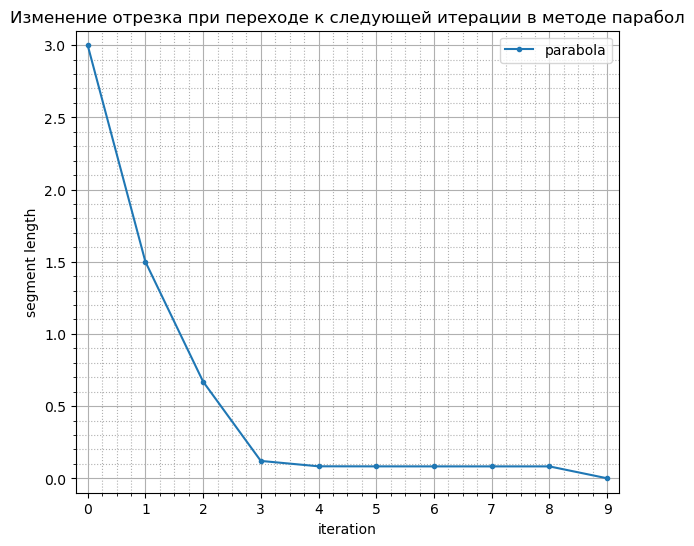

In [20]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(parabola_segments.index, parabola_segments["length"], label="parabola", marker='.')
ax.set_title("Изменение отрезка при переходе к следующей итерации в методе парабол")
ax.set_xlabel('iteration')
ax.set_ylabel('segment length')
ax.legend()

ax.set_xlim((-0.2, 9.2))
ax.set_ylim((-0.1, 3.1))

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))

ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle=':')

plt.show()

-1.8276172773709586e-162 610


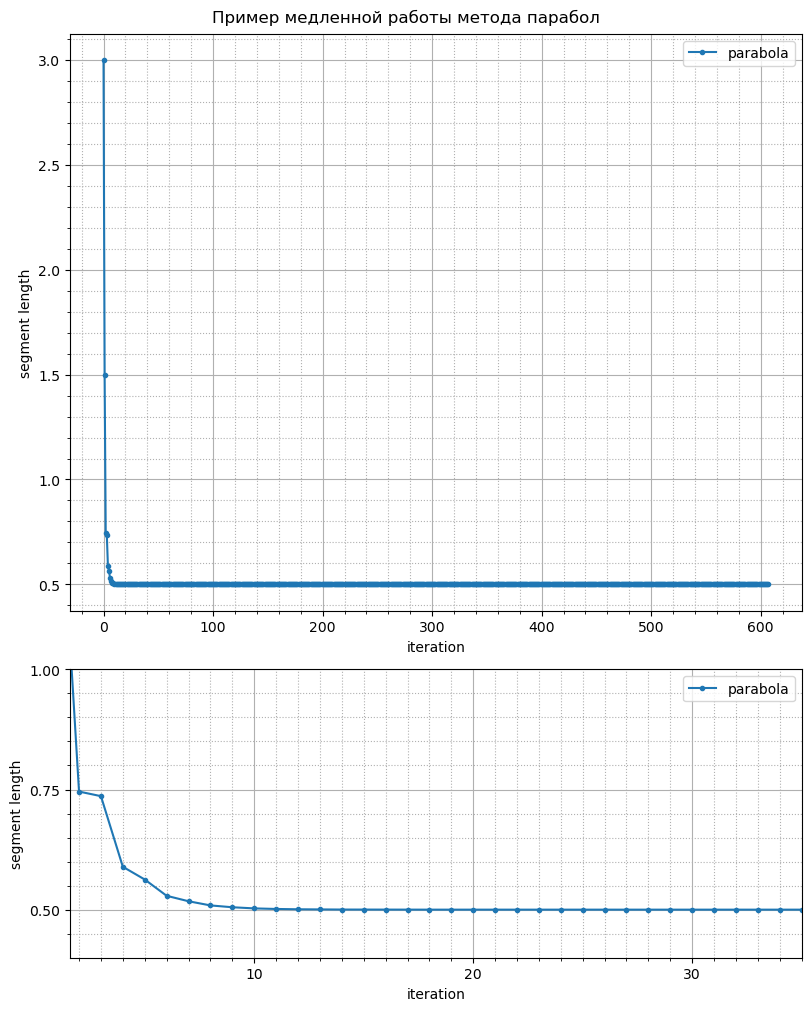

In [21]:
from matplotlib.gridspec import GridSpec

minimum_def, calls_def, parabola_segments_def = parabola_method(function, -1, 2, eps)
print(minimum_def, calls_def)

fig = plt.figure(figsize=(8, 10), layout="constrained")
fig.suptitle("Пример медленной работы метода парабол")
gs = GridSpec(2, 1, figure=fig, height_ratios=[2, 1])
ax = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax.plot(parabola_segments_def.index, parabola_segments_def["length"], label="parabola", marker='.')

ax.set_xlabel('iteration')
ax.set_ylabel('segment length')
ax.legend()

ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))

ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle=':')


ax1.plot(parabola_segments_def.index, parabola_segments_def["length"], label="parabola", marker='.')

ax1.set_xlabel('iteration')
ax1.set_ylabel('segment length')
ax1.legend()

ax1.set_xlim((1.6, 35))
ax1.set_ylim((0.4, 1))

ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.xaxis.set_minor_locator(AutoMinorLocator(10))

ax1.yaxis.set_major_locator(MultipleLocator(0.25))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))

ax1.grid(which='major', linestyle='-')
ax1.grid(which='minor', linestyle=':')

plt.show()

### Метод Брента

In [22]:
def brent_method(func, left, right, eps):
    x = w = v = (left + right) / 2
    f_x = f_w = f_v = func(x)
    calls = 1
    d = e = right - left
    is_parabola: bool
    u: float
    segments = pd.DataFrame({"left": [], "right": [], "length": [], "length diff": []})
    segments.index.name = "iteration"
    segments.loc[len(segments)] = [left, right, right - left, '']

    while d > eps:
        is_parabola = False
        g = e
        e = d
        if not (x == w or x == v or w == v or f_x == f_w or f_x == f_v or f_v == f_w):
            u = w - (((w - x)**2) * (f_w - f_v) - ((w - v)**2) * (f_w - f_x)) / (2 * ((w - x) * (f_w - f_v) - (w - v) * (f_w - f_x)))
            if left + eps <= u <= right - eps and abs(u - x) < g / 2:
                is_parabola = True
                d = abs(u - x)
        if not is_parabola:
            if x < (right - left) / 2:
                u = x + K * (right - x)
                d = right - x
            else:
                u = x - K * (x - left)
                d = x - left
            if abs(u - x) < eps and False: #TODO УДАЛИТЬ!!!
                u = x + np.sign(u - x) * eps
        f_u = func(u)
        calls += 1
        if f_u <= f_x:
            if u >= x:
                left = x
            else:
                right = x
            v = w
            w = x
            x = u
            f_v = f_w
            f_w = f_x
            f_x = f_u
        else:
            if u >= x:
                right = u
            else:
                left = u
            if f_u <= f_w or w == x:
                v = w
                w = u
                f_v = f_w
                f_w = f_u
            elif f_u <= f_v or v == x or v == w:
                v = u
                f_v = f_u
        segments.loc[len(segments)] = [left, right, right - left, segments.iloc[-1]["length"] / (right - left)]
    return x, calls, segments

In [23]:
minimum, calls, brent_segments = brent_method(function, a, b, eps)
print(minimum, calls)
print(abs(real_min - minimum))
brent_segments

-7.58720290650739 6
2.5524004586330307e-05


,left,right,length,length diff
iteration,,,,
0,-10.000000,-7.000000,3.000000,
1,-8.500000,-7.000000,1.500000,2.0
2,-7.927051,-7.000000,0.927051,1.618034
3,-7.623512,-7.000000,0.623512,1.486821
4,-7.623512,-7.572949,0.050563,12.331372
5,-7.587755,-7.572949,0.014806,3.415022


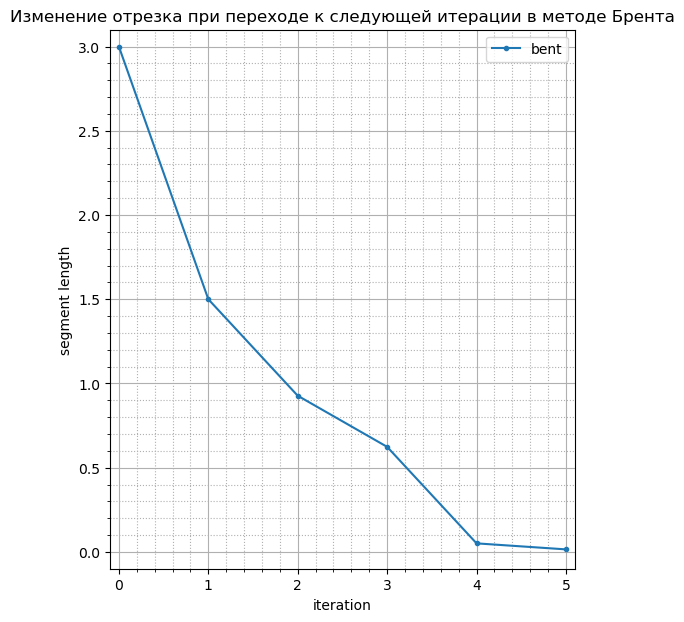

In [24]:
fig, ax = plt.subplots(figsize=(6, 7))
ax.plot(brent_segments.index, brent_segments["length"], label="bent", marker='.')
ax.set_xlabel('iteration')
ax.set_ylabel('segment length')
ax.set_title("Изменение отрезка при переходе к следующей итерации в методе Брента")
ax.legend()

ax.set_xlim((-0.1, 5.1))
ax.set_ylim((-0.1, 3.1))

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))

ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle=':')

plt.show()

## Сравнение методов

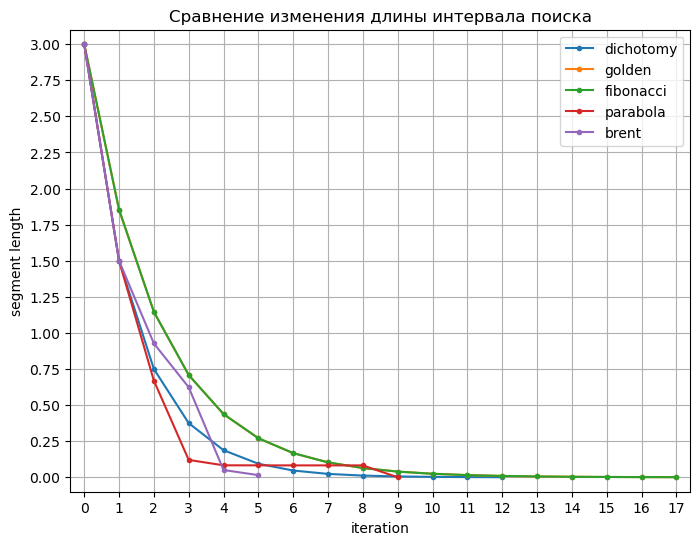

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(dichotomy_segments.index, dichotomy_segments["length"], label="dichotomy", marker='.')
ax.plot(golden_segments.index, golden_segments["length"], label="golden", marker='.')
ax.plot(fibonacci_segments.index, fibonacci_segments["length"], label="fibonacci", marker='.')
ax.plot(parabola_segments.index, parabola_segments["length"], label="parabola", marker='.')
ax.plot(brent_segments.index, brent_segments["length"], label="brent", marker='.')
ax.set_xlabel('iteration')
ax.set_ylabel('segment length')
ax.set_title("Сравнение изменения длины интервала поиска")
ax.legend()

ax.set_xlim((-0.4, 17.4))
ax.set_ylim((-0.1, 3.1))

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(0.25))

ax.grid(which='major', linestyle='-')

plt.show()


## Работа методов при разных $ɛ$

In [26]:
def create_grid(ax):
    ax.yaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_locator(MultipleLocator(0.02))
    
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))

    ax.grid(which='major', color='#CCCCCC', linestyle='-')
    ax.grid(which='minor', color='#CCCCCC', linestyle=':')

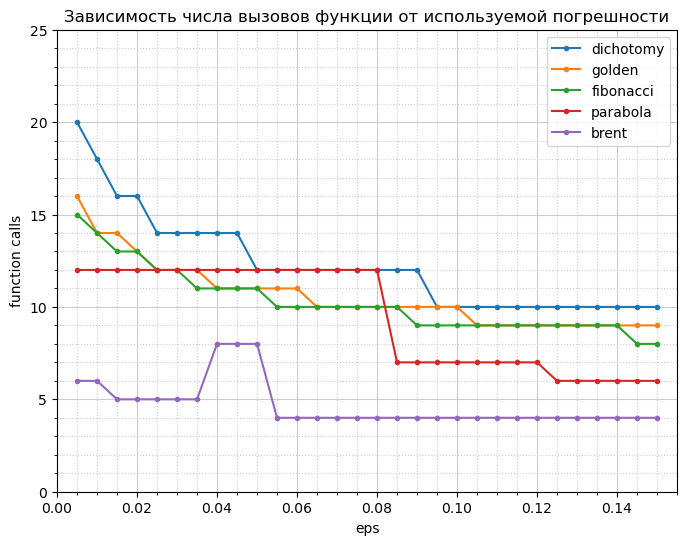

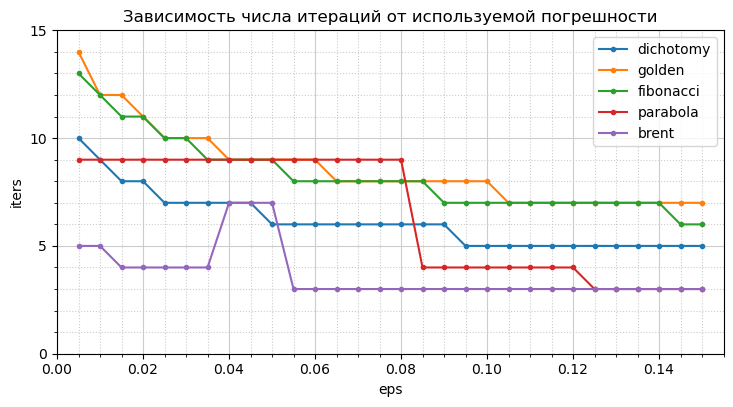

In [27]:
args = np.arange(0.005, 0.155, 0.005)
dichotomy_calls, golden_calls, fibonacci_calls, parabola_calls, brent_calls = ([] for i in range(5))
dichotomy_iters, golden_iters, fibonacci_iters, parabola_iters, brent_iters = ([] for i in range(5))
for arg in args:
    _, calls, seg = dichotomy_method(function, a, b, arg)
    dichotomy_calls.append(calls)
    dichotomy_iters.append(seg.index[-1])
    _, calls, seg = golden_method(function, a, b, arg)
    golden_calls.append(calls)
    golden_iters.append(seg.index[-1])
    _, calls, seg = fibonacci_method(function, a, b, arg)
    fibonacci_calls.append(calls)
    fibonacci_iters.append(seg.index[-1])
    _, calls, seg = parabola_method(function, a, b, arg)
    parabola_calls.append(calls)
    parabola_iters.append(seg.index[-1])
    _, calls, seg = brent_method(function, a, b, arg)
    brent_calls.append(calls)
    brent_iters.append(seg.index[-1])

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_ylim(0, 25)
ax.set_xlim(0, 0.155)

create_grid(ax)

ax.plot(args, dichotomy_calls, label="dichotomy", marker='.')
ax.plot(args, golden_calls, label="golden", marker='.')
ax.plot(args, fibonacci_calls, label="fibonacci", marker='.')
ax.plot(args, parabola_calls, label="parabola", marker='.')
ax.plot(args, brent_calls, label="brent", marker='.')

ax.set_xlabel("eps")
ax.set_ylabel("function calls")
ax.set_title("Зависимость числа вызовов функции от используемой погрешности")
ax.legend()


fig1, ax1 = plt.subplots(figsize=(8.6, 4.2))

ax1.set_ylim(0, 15)
ax1.set_xlim(0, 0.155)

create_grid(ax1)

ax1.plot(args, dichotomy_iters, label="dichotomy", marker='.')
ax1.plot(args, golden_iters, label="golden", marker='.')
ax1.plot(args, fibonacci_iters, label="fibonacci", marker='.')
ax1.plot(args, parabola_iters, label="parabola", marker='.')
ax1.plot(args, brent_iters, label="brent", marker='.')

ax1.set_xlabel("eps")
ax1.set_ylabel("iters")
ax1.set_title("Зависимость числа итераций от используемой погрешности")
ax1.legend()

plt.show()


## Поиск минимума многомодальной функции

Возьмем функцию ту же функцию, но будем искать минимум на отрезке $[-21,-6]$. На этом отрезке локальный минимум находится в точке $x=-20.322$

In [28]:
a1 = -45.6
b1 = -17.4
eps1 = 0.001

real_min1 = -20.321776083204114

In [29]:
minimum, calls, segments = dichotomy_method(function, a1, b1, eps1)
print(minimum, calls)
print(abs(minimum - real_min1))
segments

-39.219113159179685 30
18.89733707597557


,left,right,length,length diff
iteration,,,,
0,-45.600000,-17.400000,28.200000,
1,-45.600000,-31.500000,14.100000,2.0
2,-45.600000,-38.550000,7.050000,2.0
3,-42.075000,-38.550000,3.525000,2.0
4,-40.312500,-38.550000,1.762500,2.0
5,-39.431250,-38.550000,0.881250,2.0
6,-39.431250,-38.990625,0.440625,2.0
7,-39.431250,-39.210938,0.220312,2.0
8,-39.321094,-39.210938,0.110156,2.0


In [30]:
minimum, calls, segments = golden_method(function, a1, b1, eps1)
print(minimum, calls)
print(abs(minimum - real_min1))
segments

-26.62839675379496 24
6.306620670590846


,left,right,length,length diff
iteration,,,,
0,-45.600000,-17.400000,28.200000,
1,-34.828558,-17.400000,17.428558,1.618034
2,-34.828558,-24.057117,10.771442,1.618034
3,-30.714234,-24.057117,6.657117,1.618034
4,-28.171442,-24.057117,4.114325,1.618034
5,-28.171442,-25.628649,2.542792,1.618034
6,-27.200181,-25.628649,1.571532,1.618034
7,-27.200181,-26.228921,0.971260,1.618034
8,-26.829193,-26.228921,0.600272,1.618034


In [31]:
minimum, calls, segments = fibonacci_method(function, a1, b1, eps1)
print(minimum, calls)
print(abs(minimum - real_min1))
segments

-26.628636714892803 23
6.306860631688689


,left,right,length,length diff
iteration,,,,
0,-45.600000,-17.400000,28.200000,
1,-34.828558,-17.400000,17.428558,1.618034
2,-34.828558,-24.057117,10.771441,1.618034
3,-30.714234,-24.057117,6.657117,1.618034
4,-28.171442,-24.057117,4.114325,1.618034
5,-28.171442,-25.628649,2.542792,1.618034
6,-27.200181,-25.628649,1.571532,1.618034
7,-27.200181,-26.228921,0.971260,1.618034
8,-26.829193,-26.228921,0.600272,1.618034


In [32]:
minimum, calls, segments = parabola_method(function, a1, b1, eps1)
print(minimum, calls)
print(abs(minimum - real_min1))
segments

-39.21889020468947 21
18.89711412148536


,left,right,length,length diff
iteration,,,,
0,-45.600000,-17.400000,2.820000e+01,
1,-45.600000,-30.008587,1.559141e+01,1.808688
2,-45.600000,-31.500000,1.410000e+01,1.105774
3,-40.072755,-31.500000,8.572755e+00,1.644745
4,-40.072755,-36.223731,3.849024e+00,2.227254
5,-40.072755,-38.631223,1.441532e+00,2.670093
6,-40.072755,-39.203781,8.689747e-01,1.658889
7,-40.072755,-39.214218,8.585377e-01,1.012157
8,-40.072755,-39.217688,8.550674e-01,1.004058


In [33]:
minimum, calls, segments = brent_method(function, a1, b1, eps1)
print(minimum, calls)
print(abs(minimum - real_min1))
segments

-26.628359850486234 9
6.30658376728212


,left,right,length,length diff
iteration,,,,
0,-45.600000,-17.400000,28.200000,
1,-31.500000,-17.400000,14.100000,2.0
2,-31.500000,-22.785721,8.714279,1.618034
3,-27.357554,-22.785721,4.571833,1.90608
4,-27.357554,-25.881883,1.475671,3.098139
5,-27.357554,-26.114279,1.243275,1.186922
6,-27.357554,-26.616824,0.740730,1.678445
7,-27.357554,-26.621091,0.736463,1.005794
8,-27.357554,-26.628079,0.729475,1.00958
